<div
    style='background-image: url("FIGURES/iceland.png"); padding: 0px;
    background-size: cover; border-radius: 10px; height: 250px;
    background-position: 50% 50%'>
    <div
        style="float: left; margin: 20px; padding: 10px;
        background: rgba(255 , 255 , 255 , 0.8); width: 96%; height: 150px;
        border-radius: 10px">
        <div
            style="position: relative; top: 50%;
            transform: translatey(-50%)">
            <div
                style="font-size: xx-large; font-weight: 900;
                color: rgba(0 , 0 , 0 , 0.9);
                line-height: 100%">
                Studying SW Iceland using ambient seismic noise
            </div>
            <div
                style="font-size: large; padding-top: 20px;
                color: rgba(0 , 0 , 0 , 0.7)">
                <p>Active learning session by <em>Cornelis Weemstra</em>, CEG, TU Delft
            </div>
        </div>
    </div>
</div>

# Introduction


Ambient seismic noise seismology has taken an enormous flight over the past 15 years. It mainly started with the, by now, seminal paper by Shapiro & Campillo in 2004. In their study, the authors show how the crosscorrelation of long recordings (months to years) of ambient seismic noise approaches the surface-wave part of the so-called Green's function (henceforth surface wave Green's function). At frequencies between 0.05 and 0.5 Hz, most of this noise is generated by the continous cyclic forcing of ocean waves. The relation between the time-averaged crosscorrelation and the surface wave Green's function implies that, by computing the time-averaged crosscorrelation between the recordings by two seperate stations, one of these stations can be turned into a (virtual) source. The signal of this virtual source recorded by the other station. The most notable application of this phenomenon is therefore the extraction of station-station phase (or group) velocities from ambient seismic surface-wave noise. The extracted phase (or group) velocities often serve as input parameters for tomographic inverse problems. For example, the figure below introduces the Afar region in Eastern Africa (Korostelev et al., 2015):

<br/>
<table>
<tr>
<td valign="Top"> <img src="figs/Earth.png" style="width: 516px;"/> </td>
    <td> &nbsp;&nbsp;&nbsp; </td>
<td valign="Top"> <img src="figs/Korostelev_fig2.png" style="width: 500px;"/> </td>
</tr>
<table/>
<br/>

On the right you see the direct surface-wave paths between the various seismic stations (red lines). After determining the phase velocity of these surface waves, and solving the associated tomographic system of eqautions, a so called surface-wave map can be produced:

<br/>

<img src="figs/Korostelev_fig4.png" style="width: 800px;"/>
<br/>

Recently, I have computed the time-averaged crosscorrelation between a large number of seismic stations in SW Iceland. In this short exercise, you will estimate the (group) velocity of surface waves between two of these seismic stations: "KEF" and "O17" (figure below), and examine the surface waves' characteristics.

<br/>

<img src="figs/station_config.png" width="500px;"/>
<br/>


# Theory

In their study, Shapiro & Campillo (2004) show how the crosscorrelation of months of recordings of ambient seismic noise approaches the surface-wave part of the so-called Green's function. To understand this, consider the following two-dimensional configuration:


<br/>

<img src="figs/SIconfig.png" width="300px;"/>

Assuming equally powerful, bandlimited sources (top), the time-averaged crosscorrelations computed from the noise recordings at $\mathbf{x}$ and $\mathbf{x}_{\mathrm{R}}$ can be related to the surface wave Green's function between these two locations. Specifically, both the bandlimited Green's function between $\mathbf{x}$ and $\mathbf{x}_{\mathrm{R}}$, and its time reverse, can be retrieved (bottom). Let me therefore first define the crosscorrelation function (CCF):

\begin{equation}
  	C\left(t,\mathbf{x}_{\mathrm{R}} ,\mathbf{x}\right) \; \equiv \; \sum_{j} \int_{-\infty}^{\infty} \; v\left(\tau, \mathbf{x},\mathbf{x}^{(j)}_{\mathrm{S}}\right)  v\left( t + \tau, \mathbf{x}_{\mathrm{R}} ,\mathbf{x}_{\mathrm{S}}^{(j)} \right) d \tau,
\end{equation}

where $t$ is time, $\tau$ integration time, and where $v\left(\mathbf{x}_{\mathrm{R}} ,\mathbf{x}_{\mathrm{S}}^{(j)} \right)$ and $ v\left(\mathbf{x},\mathbf{x}^{(j)}_{\mathrm{S}} \right)$ represent recordings of vertical-component particle velocity at $\mathbf{x}_{\mathrm{R}}$ and $\mathbf{x}$, respectively, due to a vertical point source at $\mathbf{x}^{(j)}_{\mathrm{S}}$.   
    
The retrieval of the bandlimited Green's function and its time reverse from ambient seismic noise, relies on the abovementioned relation between the CCF and those Green's functions:

\begin{equation}
  		C\left(t,\mathbf{x}_{\mathrm{R}} ,\mathbf{x}\right) \; \propto \; G \left(t,\mathbf{x}_{\mathrm{R}} ,\mathbf{x}\right) + G\left(-t,\mathbf{x}_{\mathrm{R}} ,\mathbf{x}\right),
\end{equation}

**Importantly, in case sources are simultaneously acting uncorrelated noise sources, instead of sequentially acting active sources, the explicit summation over sources is obviated. The summation in the first equation may in that case to be replaced by integration over sufficiently long time and/or summation over sufficient crosscorrelation windows.**





In [88]:
#Collection of functions used below. There is no need to go through these, 
#but if you want better understand what is happing in the (python) background, feel free to

def plotCCF(stack, maxlag, figurename=None):

    # define the time vector for the correlation (length of corr = corrwin + 1)
    limit = (len(stack[0].data) / 2.) * stack[0].stats.delta
    timevec = np.arange(-limit, limit, stack[0].stats.delta)

    plt.rcParams["figure.figsize"] = [16,9]
    
    plt.plot(timevec, stack[0].data, 'k')
    plt.title("Stacked correlation between stations KEF and O17")
    plt.xlim(-maxlag, maxlag)
    plt.xlabel('time [s]')
    if figurename is not None:
        fig.savefig(figurename, format="pdf")
    else:
        plt.show()


# The time-averaged crosscorrelation

## Reading the data

First read the time-averaged crosscorrelation between station KEF and O17. The CCF is contained in the folder ./data of the directory structure. The python object CCF below contains both the header information "CCF[0].stats" and the actual data "CCF[0].data" 

In [89]:
from obspy import read
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

CCF = read("data/total_013672.SAC", debug_headers=True)

## Printing header values

In [90]:
print('The sampling interval is',CCF[0].stats.delta,'seconds')
print(" ")
print('The total number of samples is',CCF[0].stats.npts,)
print(" ")
print('These are the first and last data values',CCF[0].data)    

The sampling interval is 0.04 seconds
 
The total number of samples is 180000
 
These are the first and last data values [ 0.0880044   0.11739044  0.11295661 ... -0.02502761 -0.00077642
  0.04051324]


<br/><br/>QUESTION 1: What is the length of the seismic trace that we just read ? <br/>

## Plotting the data

The CCF can be plotted with plotCCF function. Since it doesn't make much sense to look at a 2 hour long correlation signal, you can decide to plot only the central part by specifying a different maxlag (in seconds).

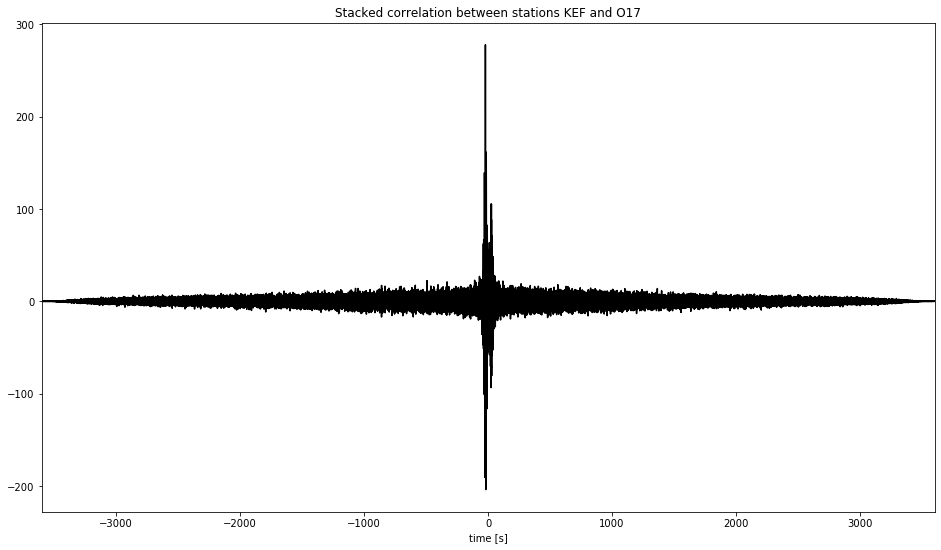

In [91]:
maxlag=3600
plotCCF(CCF,maxlag)

<br/><br/>QUESTION 2: According to theory (equations and figure above), the CCF should coincide with the Green's function, plus its time reverse. Can you show this ? (think about maxlag!)

QUESTION 3: In case you were successful in Q2, can you give an estimate of the speed of the surface waves? <br/>

## Surface wave dispersion

Surface waves propagating along the surface of the Earth are known to be highly dispersive. In a seismoligical context, dispersion means that different frequencies travel with different velocities.

<br/><br/>QUESTION 4: Using the code below, can you demonstrate that the surface waves traveling between the two icelandic seismic stations are dispersive?

<br/>


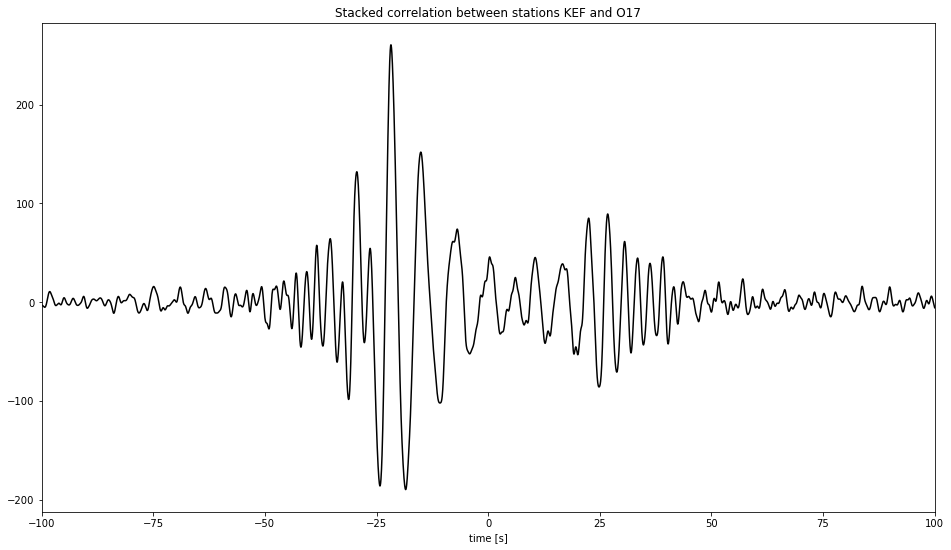

In [83]:
fmin=0.1
fmax=1


CCF_cp = CCF.copy()                                                 # copy stream
CCF_cp.detrend('linear')                                            # remove trends using detrend
CCF_cp.taper(max_percentage=0.05, type='cosine')                    # taper the edges
CCF_cp.filter('bandpass', freqmin=fmin, freqmax=fmax, zerophase=True) # filter data of all traces in the streams
maxlag=100
plotCCF(CCF_cp,maxlag)